In [1]:
%load_ext autoreload
%autoreload 2

In [135]:
from RNA_helper import get_puzzle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import RNA
from IPython.display import SVG

In [283]:
# 1, 41, 84, 92, 97, 5, 99, 85
puzzle_idx = 85
objective_structure, sequence, puzzle_name = get_puzzle(idx=puzzle_idx, return_name=True, verbose=False)
len(objective_structure)
print(puzzle_name)

85 -130.6999969482422 -110.80000305175781
no

Methaqualone C16H14N2O Structural Representation


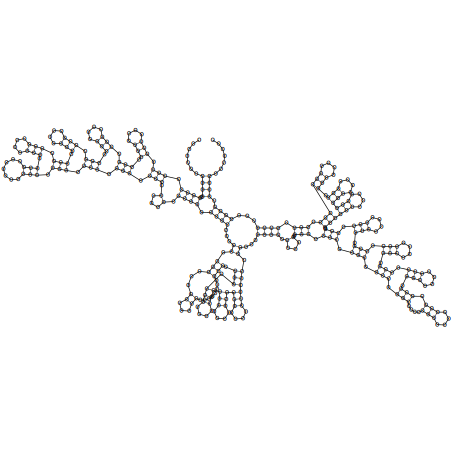

In [284]:
svg_name = f'{puzzle_name}.svg'
RNA.svg_rna_plot('o'*len(objective_structure), objective_structure, svg_name)
SVG(svg_name)

In [285]:
pairs = objective_structure.count('(')
singles = objective_structure.count('.')
print(pairs, singles)

103 149


In [286]:
(6**pairs)*(4**singles)
# 56562153335529138422812482778043669613915497613700783826466497731640186690409941783498456685539059565250758040232439061654907835525209670483827848087397550651729914797643740677281644244107264
# 60532809198219729064668738031943598464054950919317487616

71865011164264351041457946581321377753540984810774669733126942562115219775044524518956667357616480474656684306400345705751836824794833013779582052543334343695006175330304

In [287]:
# RNA.fold(sequence)

In [288]:
numeric_columns = ['free_energy', 'structure_distance', 'energy_to_objective', 'energy_reward', 'distance_reward', 'delta_free_obj_sqr', 'delta_free_obj']

In [289]:
# 84
metrics = [None, 'energies_mse']
curve_names=['hamming', 'energies_mse']
embedings=[3, 3]
# 41
# metrics = ['combined', None, 'energies_mse']
# curve_names=['hamming_with_energy', 'hamming', 'energies_mse']

# 92, 97
metrics = ['energies_mse', 'energies_mse', 'energies_mse']
curve_names=['energies_mse', 'energies_mse', 'energies_mse']
embedings=[3, 16, 2]

In [293]:
metrics = ['energies_mse']
curve_names=['energies_mse']
embedings=[3]

In [304]:
evaluation_samples = 256
# evaluation_samples = 1024

In [305]:
def get_model_name(puzzle_name, metric, features_dim = 512, EMBEDDING_DIM = 3):
    model_name = puzzle_name.lower().replace(' ', '_') + f'_{features_dim}_{EMBEDDING_DIM}'
    if metric:
        model_name = model_name + f'_{metric}'
    monitor_file=f'logs/{model_name}/0.monitor.csv'
    solutions_filename = f'solved_puzzles/{model_name}.txt'
    df = pd.read_csv(monitor_file, header=1)
    df['delta_free_obj_sqr'] = -(df['energy_to_objective'] - df['free_energy'])**2
    df['delta_free_obj'] = df['energy_to_objective'] - df['free_energy']
    print(len(df))
    return df, monitor_file, solutions_filename

def plot_data(dfs, numeric_columns=numeric_columns, N=1024, curve_names=curve_names):
    
    f, ax = plt.subplots(3, 3, figsize=(30, 18), sharex=True)
    ax = ax.reshape(-1)
    avrg_columns_list = []
    for j, df in enumerate(dfs):
        avrg_columns = df[numeric_columns].values.reshape(-1, N, len(numeric_columns)).mean(axis=1)
        avrg_columns_list.append(avrg_columns)
        for i, name in enumerate(numeric_columns):
            ax[i].plot(avrg_columns[:, i], label=curve_names[j])
            ax[i].set_title(name)
            ax[i].legend()
    f.suptitle(puzzle_name, fontsize=24)
    
    return avrg_columns_list

In [306]:

dfs = []
solution_files = []
for i, m in enumerate(metrics):
    df, _, solutions_filename = get_model_name(puzzle_name, m, EMBEDDING_DIM=embedings[i])
    dfs.append(df)
    solution_files.append(solutions_filename)
    

2304


In [307]:
solutions_filename

'solved_puzzles/methaqualone_c16h14n2o_structural_representation_512_3_energies_mse.txt'

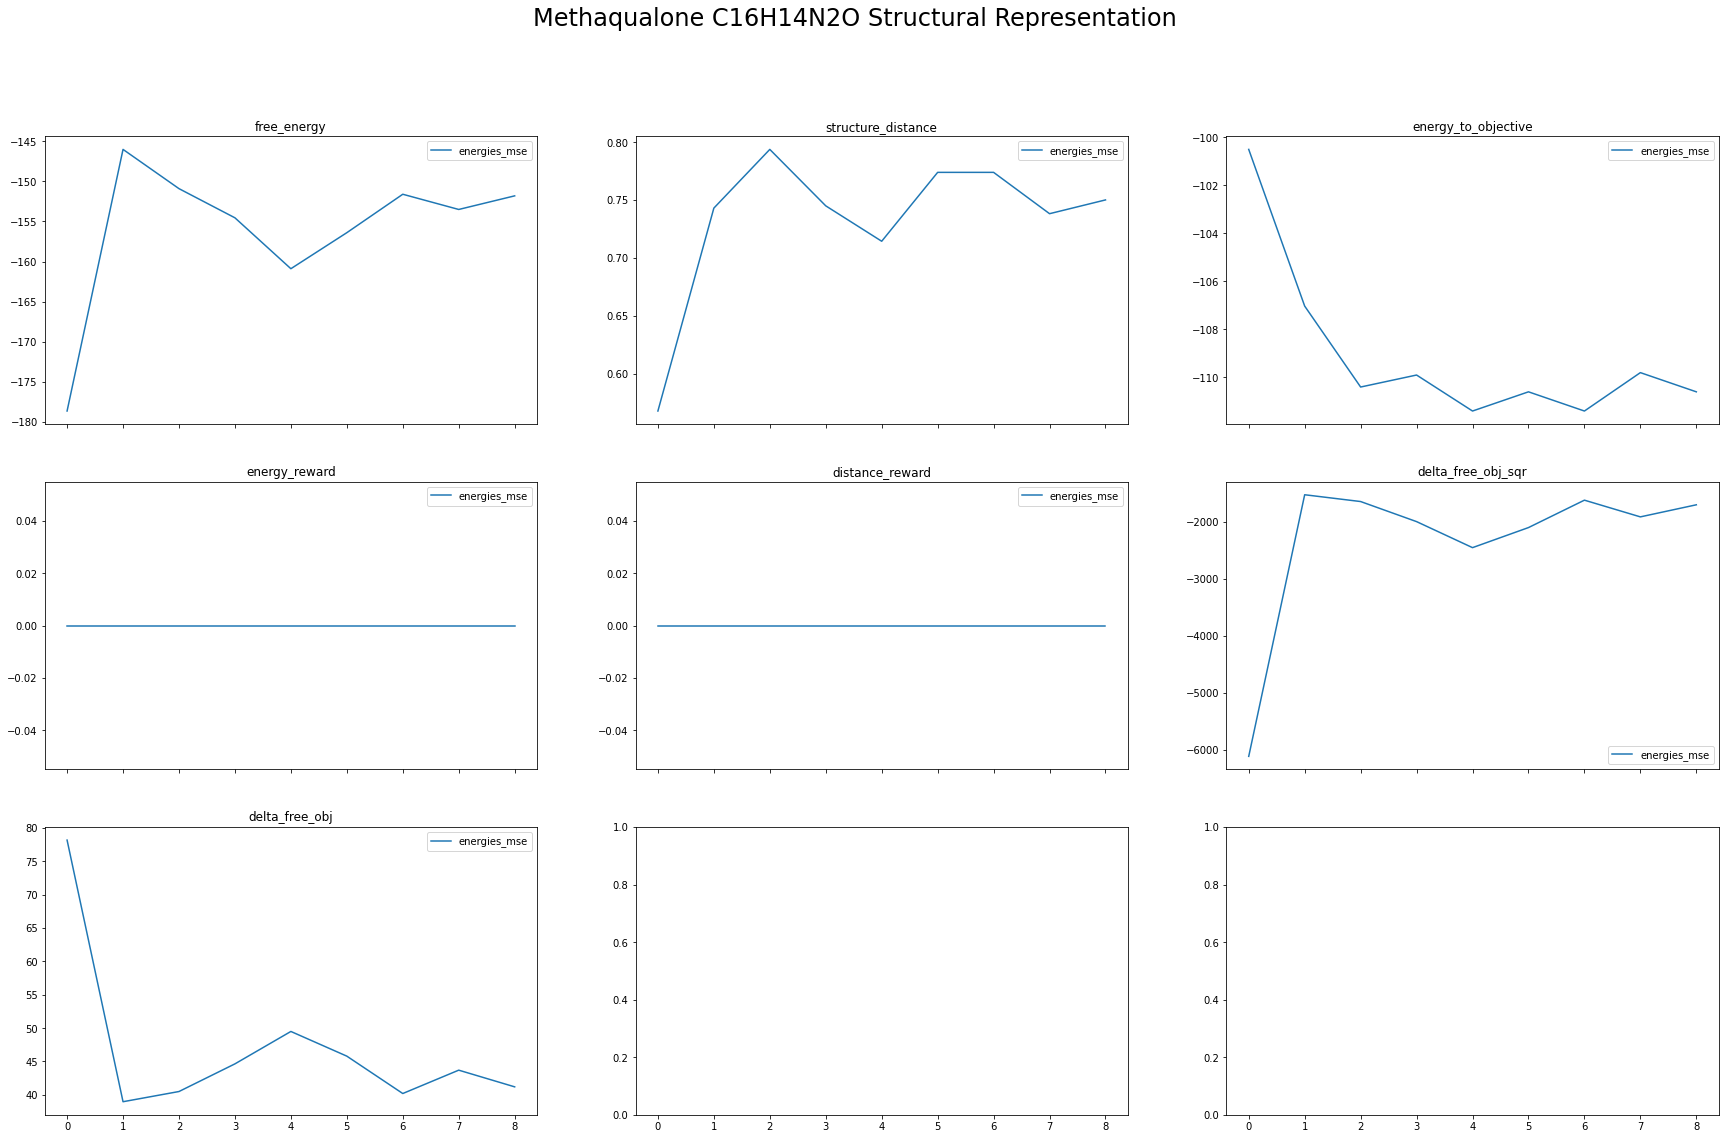

In [309]:
avrg_columns = plot_data(dfs, N=evaluation_samples)
plt.show()

In [310]:
# df

In [311]:
for a in avrg_columns:
    print(a[:, 1].max(), a[:, 5].max(), a[:, 6].min())

0.7936507936507938 -1520.867642340671 38.9714857339859


In [312]:
for df in dfs:
    print(df['structure_distance'].max(), df['delta_free_obj_sqr'].max(), df['delta_free_obj'].min())

0.7936507936507936 -1281.6402185058687 35.80000305175781


In [313]:
# df

In [315]:
chunk = evaluation_samples
n_df = 0
for N in range(len(dfs[n_df])//chunk):
    data = dfs[n_df][N * chunk:(N+1) * chunk]
    print(len(data['sequence'].values), len(set(data['sequence'].values)), (data['solved'] == True).sum())
    print(data['sequence'].iloc[0])

256 128 0
AUAUAAACCCCUGGCCUGGCAGCCAUAAGGCAGCCAGCCUUAUGGCAGCCAGCCAAAAGGCAGGCAGGCAUUUGCCAGGCAUAAAUAGCCAGCCAGGCAGGCAGCCAUUAAAAGGCCACGCCAUAGCAGCUAUAAAAAAUUAAAAAAAAAGCAAGCAGGCAAAAGCCGGCAAAAGCCGGCAAUUGCCGCUAGCAAAGCCCAUAUUAAGCCAGCCUGGCAGCCAGCCAAAAGGCAAUUGCCAGGCAGGCUAAAGCCAGGCAGGCAUAAGCCAGCCAGGCAAAUGCCAGGCAGGCGCCAUAUGGCGGGAAUACCCAGCCAUUAGGCGCCAGGCAGGGCAAAGGCGAGGGGAUUUUAU
256 63 0
UAAUAAAGCCCAGCCCAGCCAGCCAAAAGGCAGGCAGCCUAAAGGCAGGCAGCCUAAAGGCAGGCAGCCAAUUGGCAGGCAUAAAAAGCCAGCCAGCCAGCCAGGCAUUAUAAGGGCACGCCAUAGCAGCCAAAGCAAAGCAUAAAAAAGGCAGGCAGCCAAAAGGCGGCAAAAGCCGGCAUUAGCCGCCAGCAAAGCGCAUAUAAAGCCAGCCAGCCAGGCAGCCAAAAGGCAAUAGCCAGGCAGGCAAAAGCCAGCCAGCCUUAAGGCAGGCAGGCAAUAGCCAGGCAGGCGCCAAAAGGCGCGAAAACGCAGCCAAAAGGCGCCAGGCAGCGCAAAGGCGAGGGCAAAUUUU
256 4 0
UAAUAAAGCCCAGCCCAGCCAGCCAAAUGGCAGGCAGCCAAAAGGCAGGCAGCCUAAAGGCAGGCAGCCAAAAGGCAGGCAAAAAUAGCCAGCCAGCCAGCCAGGCAUAAUAAGGGCAGGCCAUAGCAGCCAAAGCAAUGCAAAAAAAAGGCAGGCAGCCAAAAGGCGGCAAAAGCCGGCAAAAGCCGCCAGCAAAGCCCAUAAAAAGCCAGCCAGGCAGGCAGCCAAAAGGCAAAAGCCAGGCAGCCAAAAGGCAGCCAG

# Solutions

In [281]:
import RNA

In [282]:
solution_sequencies = []

for f_name in solution_files:
    f = open(f_name)
    s_list = f.readlines()
    sequence = list(set([s.strip() for s in s_list]))
    solution_sequencies.append(sequence)
    print(len(s_list), '-->', len(sequence))
    f.close()

0 --> 0


In [241]:
sequences = solution_sequencies[0]

In [242]:
energies = [RNA.fold(s) for s in set(sequences)]

In [245]:
len(energies)

1703

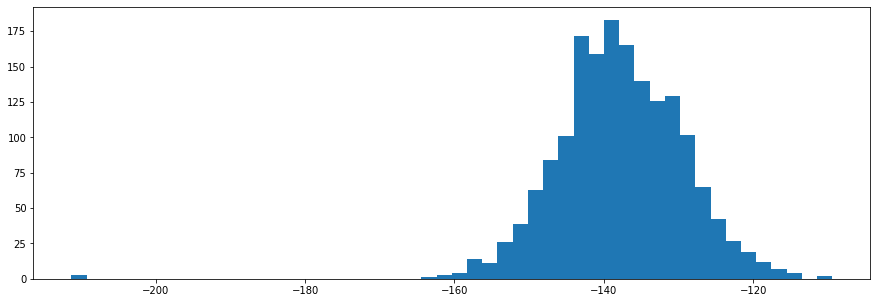

In [246]:
plt.figure(figsize=(15,5))
_ = plt.hist(np.array(energies)[:, 1].astype(float), bins=50, orientation='vertical')

In [1291]:
ens = np.array(energies)[:, 1].astype(float)

In [1294]:
idx = np.where(ens==-95)[0][0]
print(idx)

496


In [1295]:
s, e = RNA.fold(sequences[idx])

In [1296]:
objective_structure == s

True

In [1297]:
sequences[idx]

'CCAUGUGAGUAAUUGAGCUCCAGGAAAAACCAGCAAAAAGCAGAUAAAUUCAGGAAUAACCAGCACUACGCAGGAGCAUCCAUAUAGGACGCGCCAGGAGAAACCAGGAUAAACCAGCAAAUAGCACCACAUAGGACCAACAAGGAGGCGCAGGUAAAAAACCAGGGGAAGGAAUAACCAGGGAACACCAGCAAAAAGCCCCAAUAAGGAACGAAAAGUAUCCCCAGCGGCCCACGCAGGCCCAGUGAAAAACAGGAUAUACCAGGAAUAACCACCGACAAGGACCAAACAGGAGGGCCAGAUAACAAAUCAGGGACAGGGAUAACCAGCAACAAGCAGCAUUUAGCACCAAUAAGGACCAUAAAGGAGUCCCACAAUUACUCAUGUGG'